<a href="https://colab.research.google.com/github/Nico-GP/Coding-Dojo_Track2/blob/main/Week7/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Wine 
## Creado por: Nicolas Gonzalez
### Descripcion: Clasificacion de tipo de uva segun caracteristicas
* Creado: 15/02/22
* Ultima Actualizacion: 15/02/22

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
wn = pd.read_csv('/content/drive/My Drive/CodingDojo/Week7/wine.csv', header = None)
wn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [91]:
wn.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wn.head(1)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


Informacion sobre la base de datos

In [92]:
wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Se verifican valores faltantes

In [93]:
wn.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Se verifica el numero de categorias

In [94]:
wn['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

Se crea matriz de caracteristicas y vector objetivo

In [95]:
X = wn.drop(columns = 'Class label')
y = wn['Class label']

Se divide la base de datos en entrenamiento y testeo

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, stratify = y)

Se normalizan los datos de entrenamiento

In [97]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Regresion logistica uno vs uno

Se llama a regresion logistica y clasificador 1 vs 1

In [98]:
log_reg = LogisticRegression()
ovso = OneVsOneClassifier(log_reg)

Se ajustan los datos de entrenamiento

In [99]:
ovso.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression())

Coeficiente de determinacion de entrenamiento

In [100]:
ovso.score(X_train, y_train)

1.0

Coeficiente de determinacion de testeo

In [101]:
ovso.score(X_test, y_test)

1.0

> Presicion del 100% en entrenamiento y testeo

# Regresion logistica uno vs resto

Se llama a regresion logistica y clasificador 1 vs resto

In [102]:
log_reg = LogisticRegression()
ovsr = OneVsRestClassifier(log_reg)

In [103]:
ovsr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

Coeficiente de determinacion de entrenamiento

In [104]:
ovsr.score(X_train, y_train)

1.0

Coeficiente de determinacion de testeo

In [105]:
ovsr.score(X_test, y_test)

1.0

> Presicion del 100% en entrenamiento y testeo

# Regresion logistica con regularizacion l1

Se llama a regresion logistica y regularizacion l1

In [106]:
log_reg = LogisticRegression(penalty = 'l1', solver = 'liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Coeficiente de determinacion de entrenamiento

In [107]:
log_reg.score(X_train, y_train)

1.0

Coeficiente de determinacion de testeo

In [108]:
log_reg.score(X_test, y_test)

1.0

> Presicion del 100% en entrenamiento y testeo

# Regresion logistica con regularizacion l2

Se llama a regresion logistica y regularizacion l2

In [109]:
log_reg = LogisticRegression(penalty = 'l2')
log_reg.fit(X_train, y_train)

LogisticRegression()

Coeficiente de determinacion de entrenamiento

In [110]:
log_reg.score(X_train, y_train)

1.0

Coeficiente de determinacion de testeo

In [111]:
log_reg.score(X_test, y_test)

1.0

> Presicion del 100% en entrenamiento y testeo

# KNN 

Se llama a clasificador knn

In [112]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Coeficiente de determinacion de entrenamiento

In [113]:
knn.score(X_train, y_train)

0.9699248120300752

Coeficiente de determinacion de testeo

In [114]:
knn.score(X_test, y_test)

0.9777777777777777

> Presicion del 97% en entrenamiento y 98% en testeo

# Bagged tree

Se llama a clasificador de arbol embolsado

In [115]:
bt =BaggingClassifier()
bt.fit(X_train, y_train)

BaggingClassifier()

Coeficiente de determinacion de entrenamiento

In [116]:
bt.score(X_train, y_train)

1.0

Coeficiente de determinacion de testeo

In [117]:
bt.score(X_test, y_test)

0.9333333333333333

> Presicion del 100% en entrenamiento y 96% en testeo

# Random forest

Se llama a clasificador de arbol embolsado

In [118]:
rf =RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Coeficiente de determinacion de entrenamiento

In [119]:
rf.score(X_train, y_train)

1.0

Coeficiente de determinacion de testeo

In [120]:
rf.score(X_test, y_test)

0.9777777777777777

> Presicion del 97% en entrenamiento y 98% testeo

# Preguntas

¿Qué modelo funcionó mejor?

Los modelos de regresion logistica tuvieron el mejor rendimiento ya que tuvieron una precision del 100% tanto en entrenamiento como en testeo

¿Cuáles son las características más importantes de tus modelos?

In [121]:
log_reg.coef_

array([[ 0.74563286,  0.05512213,  0.52505853, -0.75991592,  0.11070019,
         0.22421155,  0.49968005, -0.15571456,  0.21523296,  0.17374224,
         0.031697  ,  0.669151  ,  1.03087631],
       [-0.82785779, -0.33307439, -0.86256153,  0.57506337, -0.21161935,
         0.02350838,  0.42763191,  0.24805613,  0.10538076, -0.97859604,
         0.68923679,  0.07998533, -0.95222042],
       [ 0.08222492,  0.27795226,  0.33750299,  0.18485255,  0.10091916,
        -0.24771993, -0.92731196, -0.09234158, -0.32061372,  0.8048538 ,
        -0.72093379, -0.74913633, -0.07865589]])

Importancia de caracteristicas de regresion logistica para la clase 1

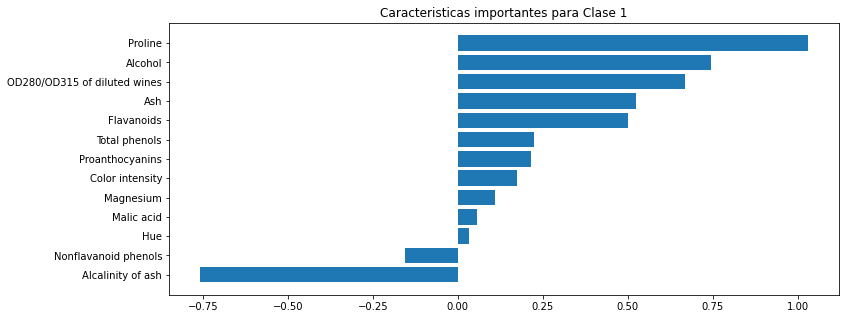

In [125]:
coef_wn = pd.DataFrame(zip(X.columns, log_reg.coef_[0]), columns = ['Feature', 'Coef'])
coef_wn.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(coef_wn['Feature'], coef_wn['Coef'])
plt.title('Caracteristicas importantes para Clase 1');

Importancia de caracteristicas de regresion logistica para la clase 2

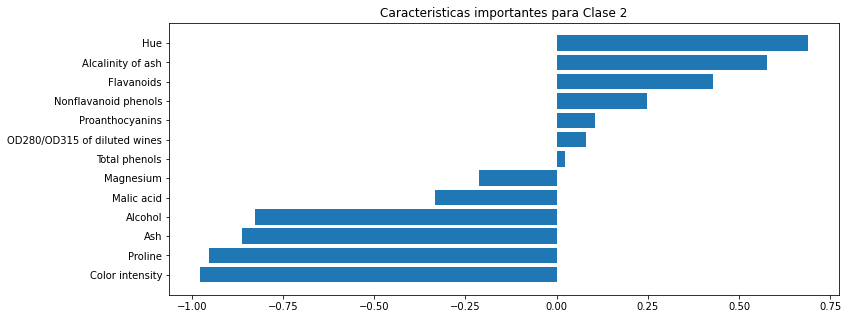

In [126]:
coef_wn = pd.DataFrame(zip(X.columns, log_reg.coef_[1]), columns = ['Feature', 'Coef'])
coef_wn.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(coef_wn['Feature'], coef_wn['Coef'])
plt.title('Caracteristicas importantes para Clase 2');

Importancia de caracteristicas de regresion logistica para la clase 3

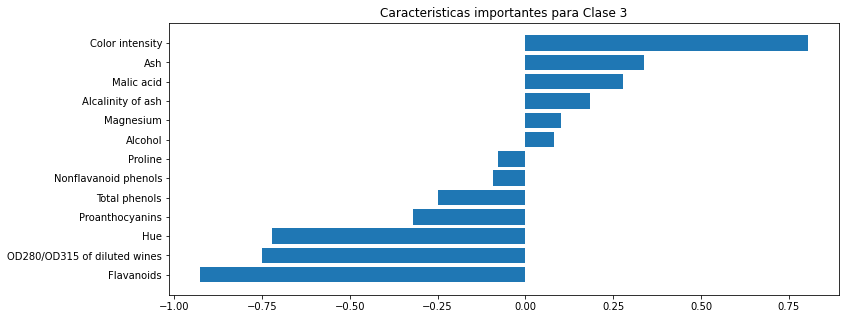

In [127]:
coef_wn = pd.DataFrame(zip(X.columns, log_reg.coef_[2]), columns = ['Feature', 'Coef'])
coef_wn.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(coef_wn['Feature'], coef_wn['Coef'])
plt.title('Caracteristicas importantes para Clase 3');